# Cartopy

To this point we have been able to make some basic plots, but we often want to plot data on a map. This is not necessarily a trivial problem, but there is a new Python module called Cartopy that is relatively easy to use.

Cartopy is being developed by the UKMet office and information about the module can be found at 

http://scitools.org.uk/cartopy/docs/latest/index.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data as per usual with the netCDF4 module
# Only change is that instead of a local or absolute address to the data
# you put in the appropriate OPeNDAP web link
from netCDF4 import Dataset, num2date
data = Dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/'+
               'Datasets/ncep.reanalysis.derived/pressure/air.mon.mean.nc','r')
levs  = data.variables['level'][:]
lats  = data.variables['lat'][:]
lons  = data.variables['lon'][:]

lev_850 = np.where(levs == 850)[0][0]
print(lev_850,levs[lev_850])

air = data.variables['air']
temp_850 = data.variables['air'][:,lev_850,:,:]

time = data.variables['time']
vtimes = num2date(time[:],time.units)

2 850.0


## Loading the module
One of the main aspects that we need to account for to create a map is the map projection, so we are going to begin by bringing in the coordinate reference system (crs) from Caropty and set the projection to be a Plate Carree projection.

Since our data is on a cylindrical data, it will be easy to use a cylindrical coordinate system (e.g., PlateCarree)

In [2]:
# To plot something on a map we need to bring in another 
#    module to help us called Cartopy
import cartopy.crs as ccrs
crs = ccrs.PlateCarree()

In [3]:
# Make a grid of lat/lon values to use for plotting with Cartopy.
# The function meshgrid will create a two dimensional array from 
#     two 1D arrays for lats/lons
# Basically defining what the latitude and longitude value 
#     is at every grid point
clons, clats = np.meshgrid(lons, lats)
print(clons)
print(clons.shape)
print(clats)
print(clats.shape)

[[   0.     2.5    5.  ...,  352.5  355.   357.5]
 [   0.     2.5    5.  ...,  352.5  355.   357.5]
 [   0.     2.5    5.  ...,  352.5  355.   357.5]
 ..., 
 [   0.     2.5    5.  ...,  352.5  355.   357.5]
 [   0.     2.5    5.  ...,  352.5  355.   357.5]
 [   0.     2.5    5.  ...,  352.5  355.   357.5]]
(73, 144)
[[ 90.   90.   90.  ...,  90.   90.   90. ]
 [ 87.5  87.5  87.5 ...,  87.5  87.5  87.5]
 [ 85.   85.   85.  ...,  85.   85.   85. ]
 ..., 
 [-85.  -85.  -85.  ..., -85.  -85.  -85. ]
 [-87.5 -87.5 -87.5 ..., -87.5 -87.5 -87.5]
 [-90.  -90.  -90.  ..., -90.  -90.  -90. ]]
(73, 144)


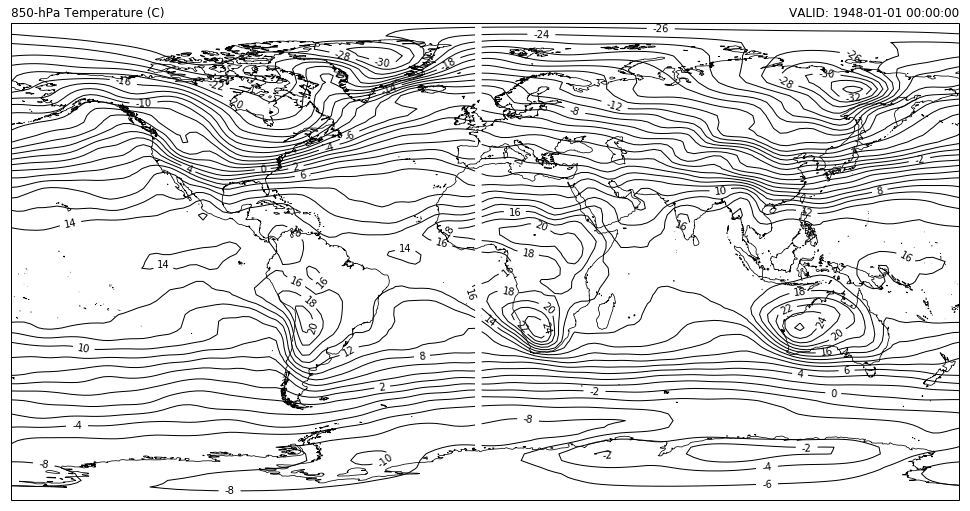

In [4]:
%matplotlib inline
# Set up and plot figure
fig=plt.figure(1,figsize=(17.,11.))

# Set up the axes to plot on
ax = fig.add_subplot(111,projection=crs)

# Set up the contour interval for temperature
# np.arange(min,max,interval)
cint = np.arange(-40,40,2)

# Do the contouring
# contour(x,y,variable,contour levels, line color, line width, line style)
cs = ax.contour(clons,clats,temp_850[0,:,:],cint,colors='k',
                linewidths=1.0,linestyles='solid')

# Label the contours
# clabel(contour handle, aspects of how the contour label will appear)
ax.clabel(cs, fontsize=10, inline=1, inline_spacing=5, fmt='%i',
          rightside_up=True, use_clabeltext=True)

# Plot the coastlines
ax.coastlines('50m',edgecolor='black',linewidth=0.75)

# Plot some titles
plt.title('850-hPa Temperature (C)',loc='left')
plt.title('VALID: %s' %(vtimes[0]),loc='right')

plt.show()

## Cyclic Points
Notice the line that is missing from the image above, this is because we are trying to plot global data and we are missing the cyclic point that will allow us to connect the last data point to the first data point.

There is a function within Cartopy Utilities (util) that will allow us to easily add this point to a dataset.

In [5]:
import cartopy.util as cutil

# To add the cyclic point to one array
#lonsc = cutil.add_cyclic_point(lons)

# To add the cyclic point to the data array and the coordinate 
#   variable that needs the cyclic point
temp_850c, lonsc = cutil.add_cyclic_point(temp_850,coord=lons)

# Comparing the shape of the lons array from the lonsc (cyclic) array
print(lons)
print(lons.shape)
print(lonsc)
print(lonsc.shape)

[   0.     2.5    5.     7.5   10.    12.5   15.    17.5   20.    22.5
   25.    27.5   30.    32.5   35.    37.5   40.    42.5   45.    47.5
   50.    52.5   55.    57.5   60.    62.5   65.    67.5   70.    72.5
   75.    77.5   80.    82.5   85.    87.5   90.    92.5   95.    97.5
  100.   102.5  105.   107.5  110.   112.5  115.   117.5  120.   122.5
  125.   127.5  130.   132.5  135.   137.5  140.   142.5  145.   147.5
  150.   152.5  155.   157.5  160.   162.5  165.   167.5  170.   172.5
  175.   177.5  180.   182.5  185.   187.5  190.   192.5  195.   197.5
  200.   202.5  205.   207.5  210.   212.5  215.   217.5  220.   222.5
  225.   227.5  230.   232.5  235.   237.5  240.   242.5  245.   247.5
  250.   252.5  255.   257.5  260.   262.5  265.   267.5  270.   272.5
  275.   277.5  280.   282.5  285.   287.5  290.   292.5  295.   297.5
  300.   302.5  305.   307.5  310.   312.5  315.   317.5  320.   322.5
  325.   327.5  330.   332.5  335.   337.5  340.   342.5  345.   347.5
  350.

In [6]:
# Reset the grid with the cyclic data points
clons, clats = np.meshgrid(lonsc, lats)
print(clons.shape)
print(clats.shape)

(73, 145)
(73, 145)


### In-class Problem #1
Re-create the image from above, but now using the cyclic data so that we don't have a gap.

In [7]:
%matplotlib inline
# Set up and plot figure
fig=plt.figure(2,figsize=(17.,12.))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.set_extent([180,-180,-90,90],ccrs.Geodetic())
#ax = plt.axes(projection=crs)
cint = np.arange(-40,40,2)
# Filled color contours
cf = ax.contourf(clons,clats,temp_850c[0,:,:],cint)
# Regular contours
cs2 = ax.contour(clons,clats,temp_850c[0,:,:],cint,colors='k',
                 linewidths=1.0,linestyles='solid')
t1 = ax.clabel(cs2,inline=False,fmt='%d',use_clabeltext=True)
for t in t1:
    t.set_bbox(dict(fc='white',ec='none',pad=1))
ax.coastlines('50m',edgecolor='black',linewidth=0.75)
plt.title('850-hPa Temperature (C)',loc='left')
plt.title('VALID: %s' %(vtimes[0]),loc='right')
# Set the colorbar to plot below the image
cbar = plt.colorbar(cf,orientation='horizontal',extend='max',
                    aspect=65,pad=0,extendrect='True')

plt.show()

std::bad_cast


RuntimeError: Unidentified problem with geometry, linestring being re-added. Please raise an issue.

std::bad_cast


RuntimeError: Unidentified problem with geometry, linestring being re-added. Please raise an issue.

## Colormaps
So far we have used the jet colormap, which is really not a very good colormap for a number of reasons. There are a number of different color maps that you could use, some of which are very useful for anomaly maps (diverging color maps). You can check out the different maps at http://matplotlib.org/examples/color/colormaps_reference.html

But how do we call these different maps?

In contourf or pcolormesh you can define a colormap with the keyword cmap. To access any of the color maps given at the reference above you would use the following

cmap = plt.cm.coolwarm

cmap = plt.cm.hot

or if you wanted one of the colormaps, but in reverse order you just add an underscore r (_r) to the name

cmap = plt.cm.gist_rainbow_r

### In-class Problem #2
Re-create the image from Problem #1, but create a raster style image using pcolormesh.

Look up matplotlib pcolormesh to figure out how to create an image using that function instead of the contour or contourf functions.

In [ ]:
# Set up and plot figure
fig=plt.figure(2,figsize=(17.,12.))

#ax = fig.add_subplot(111,projection=ccrs.PlateCarree())
ax = plt.axes(projection=crs)
ax.set_extent([180,-180,-90,90],ccrs.Geodetic())
cint = np.arange(-50,50,5)

# Filled raster image with pcolormesh
cf = ax.pcolormesh(clons,clats,temp_850[0,:,:],cmap=plt.jet(),vmin=-40, vmax=40)
# Set the colorbar to plot below the image
cbar = plt.colorbar(cf,orientation='horizontal',extend='max',aspect=65,pad=0,extendrect='True')

ax.coastlines('50m',edgecolor='black',linewidth=0.75)

plt.title('850-hPa Temperature (C)',loc='left')
plt.title('VALID: %s' %(vtimes[0]),loc='right')

plt.show()